In [60]:
import numpy as np
from numpy import genfromtxt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import GPy

In [61]:
# loading the data.
path = r"C:\Users\mikep\Desktop\project\data\final"

Xtrain = genfromtxt(path+"\Xtrain.csv", delimiter=',', skip_header=1)
Xtest = genfromtxt(path+"\Xtest.csv", delimiter=',', skip_header=1)

Ytrain = genfromtxt(path+"\Ytrain.csv", delimiter=',', skip_header=1)
Ytest = genfromtxt(path+"\Ytest.csv", delimiter=',', skip_header=1)

Ytrain = np.array([Ytrain]).T
Ytest = np.array([Ytest]).T

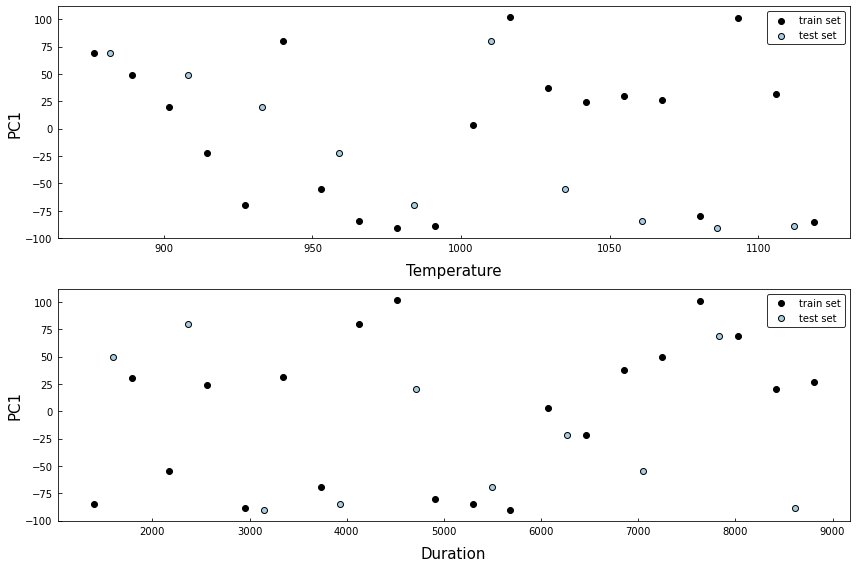

In [62]:
# visualizing the initial data

#plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(2, figsize=(12, 8))

ax[0].scatter(x = Xtrain[:,0], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[0].scatter(x = Xtest[:,0], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[0].set_xlabel("Temperature", fontsize=15, labelpad=10, horizontalalignment='center')
ax[0].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[0].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)
#ax[0].tick_params(labelbottom=False, size=4, )

ax[0].legend(loc='best', fontsize=10, edgecolor='black')

###====###

ax[1].scatter(x = Xtrain[:,1], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[1].scatter(x = Xtest[:,1], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[1].set_xlabel("Duration", fontsize=15, labelpad=10, horizontalalignment='center')
ax[1].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[1].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)

ax[1].legend(loc='best', fontsize=10, edgecolor='black')

###====###

plt.tight_layout()
#fig.savefig(r"C:\Users\mikep\Desktop\thesis\figures\data-visualization.png", facecolor='w', dpi=600)
plt.show()

In [63]:
# normalizing the input data /// standardizing the output data
norm_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

Xtrain = norm_scaler.fit_transform(Xtrain)
Xtest = norm_scaler.transform(Xtest)

Ytrain = standard_scaler.fit_transform(Ytrain)
Ytest = standard_scaler.transform(Ytest)

Ytrain

array([[ 1.05968669],
       [ 0.76137805],
       [ 0.31243028],
       [-0.33584245],
       [-1.07163811],
       [ 1.22892738],
       [-0.84320186],
       [-1.30053472],
       [-1.39404714],
       [-1.36640058],
       [ 0.05199854],
       [ 1.574117  ],
       [ 0.57850314],
       [ 0.37007693],
       [ 0.46451573],
       [ 0.40998903],
       [-1.22856084],
       [ 1.55452761],
       [ 0.48494235],
       [-1.31086703]])

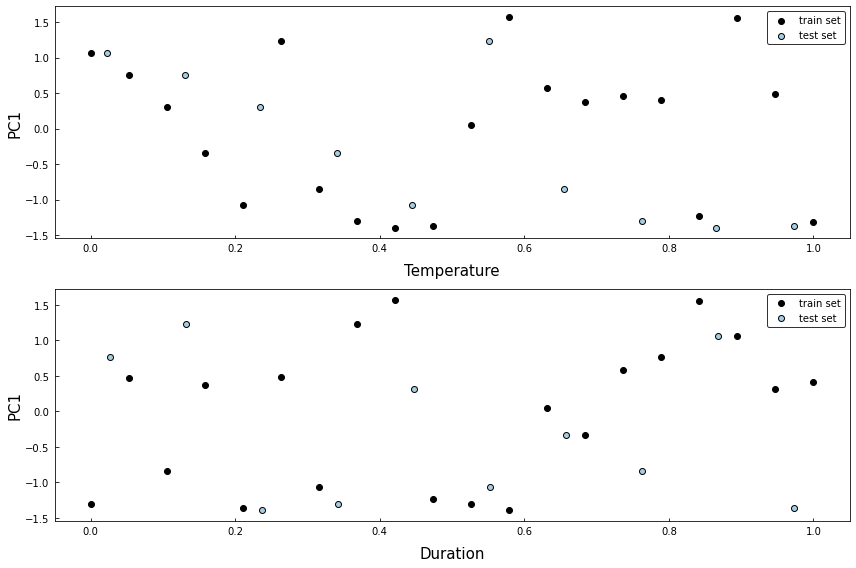

In [64]:
# visualizing the data

#plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(2, figsize=(12, 8))

ax[0].scatter(x = Xtrain[:,0], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[0].scatter(x = Xtest[:,0], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[0].set_xlabel("Temperature", fontsize=15, labelpad=10, horizontalalignment='center')
ax[0].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[0].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)
#ax[0].tick_params(labelbottom=False, size=4, )

ax[0].legend(loc='best', fontsize=10, edgecolor='black')

###====###

ax[1].scatter(x = Xtrain[:,1], y = Ytrain, marker='o', c='black', edgecolor='black', label='train set')
ax[1].scatter(x = Xtest[:,1], y = Ytest, marker='o', c='#a6cee3', edgecolor='black', label='test set')

ax[1].set_xlabel("Duration", fontsize=15, labelpad=10, horizontalalignment='center')
ax[1].set_ylabel("PC1", fontsize=15, labelpad=3, horizontalalignment='center')

ax[1].tick_params(axis='both', which='both', labelsize=10, direction="in", pad=5)

ax[1].legend(loc='best', fontsize=10, edgecolor='black')

###====###

plt.tight_layout()
#fig.savefig(r"C:\Users\mikep\Desktop\thesis\figures\data-visualization.png", facecolor='w', dpi=600)
plt.show()

# specifying 2-D kernel

```
k = GPy.kern.RBF(2, ARD=True)

k.variance=3.5482458450785975e-09
k.variance.fix()

k.lengthscale[0]=100 #50
k.lengthscale[1]=1200 #1000
k.lengthscale.fix()

k
```

In [65]:
# Construct a 2-D kernel with two 1-D kernels: RBF and Matern32

k = GPy.kern.RBF(input_dim=2)+GPy.kern.StdPeriodic(input_dim=2)

print(k)

  sum.                      |  value  |  constraints  |  priors
  rbf.variance              |    1.0  |      +ve      |        
  rbf.lengthscale           |    1.0  |      +ve      |        
  std_periodic.variance     |    1.0  |      +ve      |        
  std_periodic.period       |    1.0  |      +ve      |        
  std_periodic.lengthscale  |    1.0  |      +ve      |        


```
k = GPy.kern.RBF(2, ARD=True)

k = GPy.kern.RBF(1, active_dims=[0]) * GPy.kern.RBF(1, active_dims=[1])

k = GPy.kern.RBF(1, active_dims=[0]) * GPy.kern.Matern32(1, active_dims=[1]) ---> Good
```

In [66]:
# function for kernel plotting

def plot_kern(kernel):
    z = []
    x = []
    y = []
    
    n = np.linspace(-4, 4, 100)
    e0 = np.linspace(-4, 4, 100)
    
    for n_value in n:
        for e0_value in e0:
            x.append(n_value)
            y.append(e0_value)
            z.append(kernel.K(np.array([[n_value,e0_value],[1.,1.]]))[0][1])

    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    
    ax.plot_trisurf(x, y, z,
                    linewidth = 1,
                    antialiased = True,
                    cmap='viridis')  #viridis;
    plt.tight_layout()
    #plt.savefig(r'C:\Users\mikep\Desktop\thesis\figures\kernel.png', facecolor='w', dpi=600)
    #plt.title("Covariance Function", fontsize=25)
    plt.show()

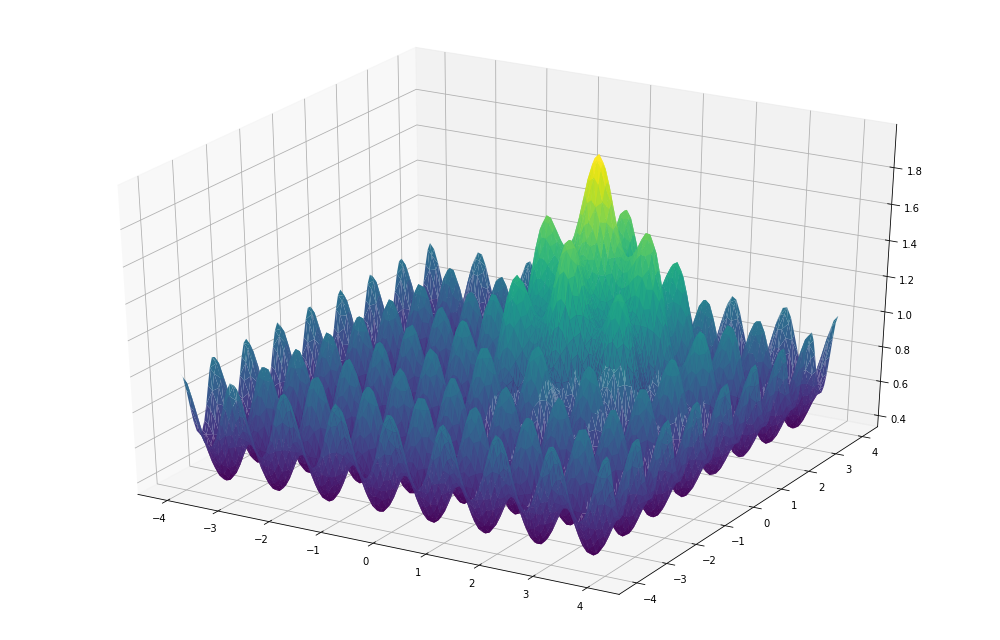

In [67]:
# plotting the initial kernel
plot_kern(k)

In [68]:
# specifying the model

m = GPy.models.GPRegression(Xtrain, Ytrain, k)

# Fix the Gaussian noise variance 
#m.Gaussian_noise.variance = 0.05 
#m.Gaussian_noise.variance.fix()

print(m)
#print(m.kern.lengthscale)


Name : GP regression
Objective : 30.96285985018685
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |  value  |  constraints  |  priors
  sum.rbf.variance              |    1.0  |      +ve      |        
  sum.rbf.lengthscale           |    1.0  |      +ve      |        
  sum.std_periodic.variance     |    1.0  |      +ve      |        
  sum.std_periodic.period       |    1.0  |      +ve      |        
  sum.std_periodic.lengthscale  |    1.0  |      +ve      |        
  Gaussian_noise.variance       |    1.0  |      +ve      |        


In [69]:
# optimization
m.optimize()
#m.optimize_restarts(50, robust=True)

print(m)
#print(m.rbf.lengthscale)


Name : GP regression
Objective : 24.452247230541886
Number of Parameters : 6
Number of Optimization Parameters : 6
Updates : True
Parameters:
  GP_regression.                |                   value  |  constraints  |  priors
  sum.rbf.variance              |   1.913307834225331e-09  |      +ve      |        
  sum.rbf.lengthscale           |      14.340599541464561  |      +ve      |        
  sum.std_periodic.variance     |      1.0233695981956867  |      +ve      |        
  sum.std_periodic.period       |      0.5757387946669297  |      +ve      |        
  sum.std_periodic.lengthscale  |     0.29850339331376397  |      +ve      |        
  Gaussian_noise.variance       |  1.4990220501331747e-09  |      +ve      |        


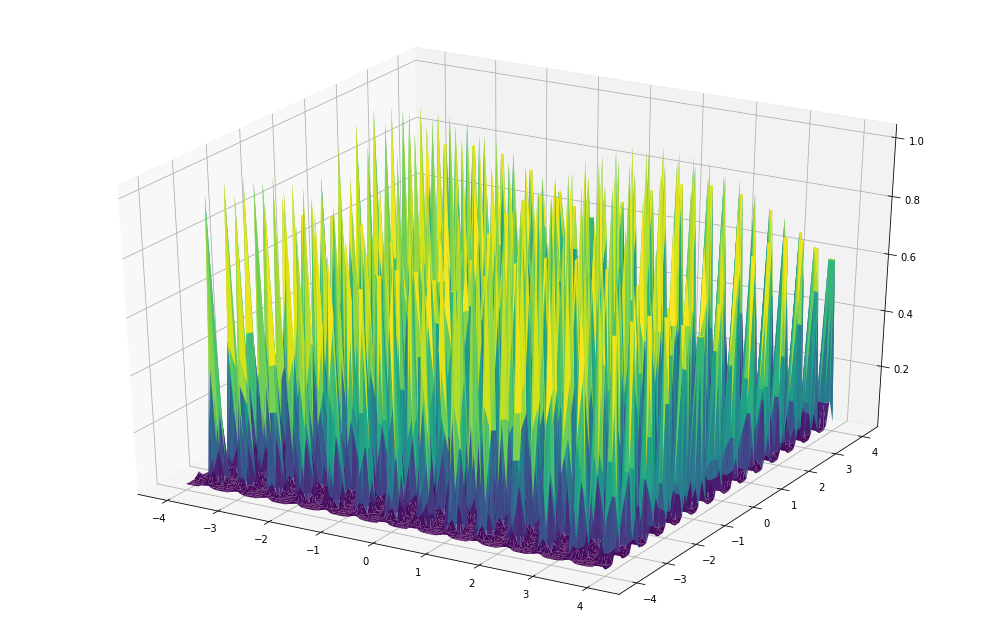

In [70]:
plot_kern(k)

In [71]:
# creating a grid
[Xi, Xj] = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100)) #raise this in the final stage
# augmenting our grid to be a list of coordinates
Xnew = np.vstack((Xi.ravel(), Xj.ravel())).T # Change our input grid to list of coordinates

In [72]:
# calculate the mean and the covariance at the grid
mean, Cov = m.predict_noiseless(Xnew, full_cov=False)

GP_regression.,value,constraints,priors
sum.rbf.variance,1.913307834225331e-09,+ve,
sum.rbf.lengthscale,14.340599541464561,+ve,
sum.std_periodic.variance,1.0233695981956867,+ve,
sum.std_periodic.period,0.5757387946669297,+ve,
sum.std_periodic.lengthscale,0.29850339331376397,+ve,
Gaussian_noise.variance,1.4990220501331747e-09,+ve,


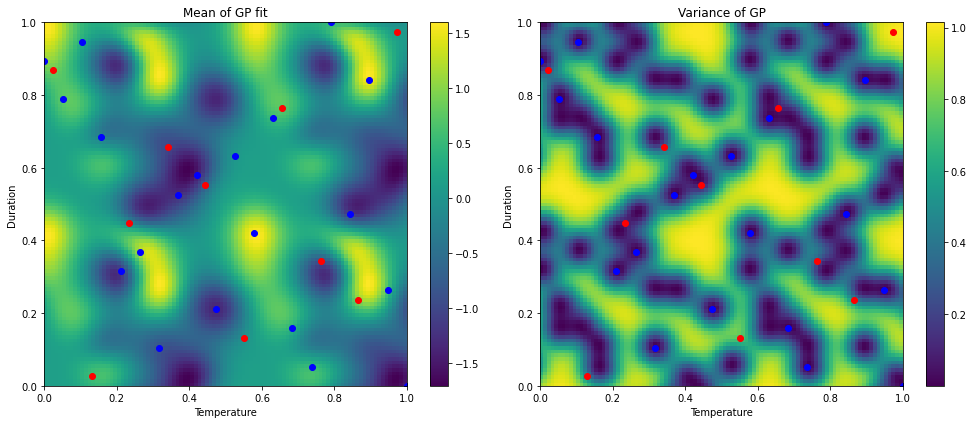

In [73]:
# plotting environment
plt.figure(figsize=(14, 6))

# left plot - mean of gp fit
plt.subplot(121)

# mean surface
plt.pcolor(Xi, Xj, mean.reshape(Xi.shape)) #contour

# sample locations
plt.plot(Xtrain[:, 0], Xtrain[:, 1], 'o', color='blue') #, plt.axis("square")
plt.plot(Xtest[:,0], Xtest[:,1], 'o', color='red')

# annotations
plt.xlabel("Temperature"), plt.ylabel("Duration")
plt.title("Mean of GP fit"), plt.colorbar()

# right plot - variance of the gp
plt.subplot(122)

# variance surface
plt.pcolor(Xi, Xj, Cov.reshape(Xi.shape))

# sample locations
plt.plot(Xtrain[:,0], Xtrain[:,1], 'o', color='blue')#, plt.axis("square")
plt.plot(Xtest[:,0], Xtest[:,1], 'o', color='red')

# annotations
plt.xlabel("Temperature"), plt.ylabel("Duration")
plt.title("Variance of GP"), plt.colorbar()

plt.tight_layout()
#plt.show()

m

### Extra

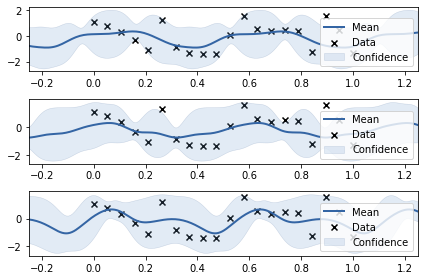

In [59]:
slices = [100, 200, 300]
figure = GPy.plotting.plotting_library().figure(3, 1)

for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1, y)], row=(i+1), plot_data=True)

In [57]:
def plot_gp(X, m, C, training_points=None):
    """ Plotting utility to plot a GP fit with 95% confidence interval """
    # Plot 95% confidence interval 
    plt.fill_between(X[:,0],
                     m[:,0] - 1.96*np.sqrt(np.diag(C)),
                     m[:,0] + 1.96*np.sqrt(np.diag(C)),
                     alpha=0.5)
    # Plot GP mean and initial training points
    plt.plot(X, m, "-")
    plt.legend(labels=["GP fit"])
    
    plt.xlabel("X"), plt.ylabel("Function")
    
    # Plot training points if included
    if training_points is not None:
        X_, Y_ = training_points
        plt.plot(X_, Y_, "kx", mew=2)
        plt.legend(labels=["GP fit", "sample points"])

ValueError: operands could not be broadcast together with shapes (20,) (10000,) 

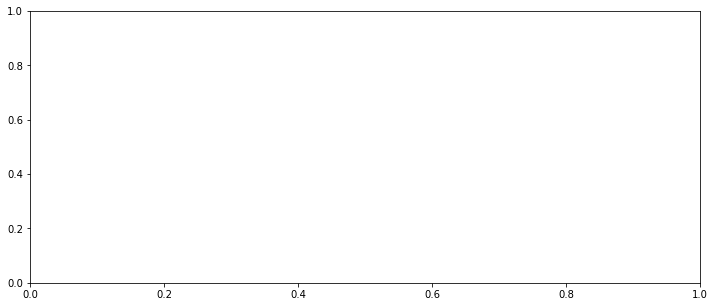

In [58]:
plt.figure(figsize=(12, 5))

# Plot the GP fit mean and covariance
plot_gp(Xtrain, mean, Cov) #,training_points=(Xtrain[:,0], Ytrain))
plt.title("Regression Model Fit")

In [ ]:
# Compare kernels

In [ ]:
# Metrics

In [ ]:
# Slices